# Assignment 5 (Week 5)

>**Note**: Late submissions are ***`penalized`***.

## Name: Faiza Yusuf

<br>

## Please show and display ALL your calculations and results.
> Remember to read the **`instructions`** carefully.

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Built-in library
import itertools
import typing as tp
import re
# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000

### Download the data [here](https://drive.google.com/file/d/1BhBejDklCoqsqqAcvycA4n7AIpeRnych/view?usp=share_link)

### Problem Statement

**Customer Personality Analysis** is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Target
Need to perform **clustering** to summarize customer segments.

### Attributes

```
Attributes

People
------
ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products
--------
MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years

Promotion
---------
NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place
-----
NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month
```

In [2]:
df = pd.read_csv("marketing_campaign.csv", sep="\t").copy()
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Qs 1
* a) Find the average of all the total amount spent on products. Call this variable `Avg_amount`. 
* b) Convert the `Avg_amount` to deciles (0,1,2,...,9) by creating a new variable, `Avg_amount(weights)` such that the higher the Avg_score, the higher the weight.

    * **COMPULSORY**: Validate your resulting by running:

```python
df[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(n=5, random_state=2)
```

In [5]:
columns = df.columns
columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
# getting the columns of prouct
product = [ var for var in columns if "Mnt" in var]
product

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [7]:
# finding the total sum of product per observation
df['total_amount'] = np.round(df[product].sum(axis=1),2)

In [147]:
# 1a Enter your solution here
df["Avg_amount"] = np.round(df[product].mean(axis=1), 2)

In [168]:
# 1b Enter your solution here
avg_amount = df["Avg_amount"]
num_bins = 10 # No of groups
label = np.arange(0,10) #no of label

amount_bin = pd.qcut(
                       x=avg_amount, q=num_bins, duplicates="drop"
                       ).astype(str)

df["Avg_amount(weights)"] = pd.qcut(
                                     x=avg_amount, q=num_bins, labels=label, duplicates="drop"
                                     ).astype(str)

dict_ = dict(itertools.zip_longest(amount_bin, df["Avg_amount(weights)"]))
dict_

{'(256.033, 420.83]': '9',
 '(0.829, 5.814]': '0',
 '(105.898, 154.33]': '6',
 '(5.814, 9.17]': '1',
 '(66.0, 105.898]': '5',
 '(15.17, 32.432]': '3',
 '(9.17, 15.17]': '2',
 '(154.33, 195.67]': '7',
 '(32.432, 66.0]': '4',
 '(195.67, 256.033]': '8'}

In [159]:
df[["total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(n=5, random_state=2)

,total_amount,Avg_amount,Avg_amount(weights)
2053,71,11.83,2
2019,22,3.67,0
1891,2069,344.83,9
335,946,157.67,7
1600,562,93.67,5


## Qs 2. 
* a) Calculate the percentage of the customer's Income spent on purchasing products.
    
    * **COMPULSORY**: Validate your resulting by running:

```python
df[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(n=5, random_state=2)
```

* b) Create a pie chart showing the total amount spent by the customers grouped by their `Marital_status`
    Note: Any customer that is not ***single***, ***together***, ***married*** or ***divorced*** should be considered as **others**.

In [160]:
# 2i Enter your solution here
df['percentage_income_spent'] = round(np.divide(df["total_amount"],df["Income"]).mul(100),2)
df[["total_amount", "Avg_amount", "Avg_amount(weights)", "percentage_income_spent"]].sample(n=5, random_state=2)

,total_amount,Avg_amount,Avg_amount(weights),percentage_income_spent
2053,71,11.83,2,0.19
2019,22,3.67,0,0.07
1891,2069,344.83,9,2.34
335,946,157.67,7,1.52
1600,562,93.67,5,1.04


In [23]:
def maritalStatus(val: str):
    if val == "Widow" or val == "Alone" or val == "Absurd" or val == "YOLO":
        val = "Others"
    return val

In [24]:
temp = df["Marital_Status"].apply(lambda value: maritalStatus(value))
x = df.groupby(temp)["total_amount"].sum()
print(temp.unique())
print("\n")
print(x)

['Single' 'Together' 'Married' 'Divorced' 'Others']


Marital_Status
Divorced    141666
Married     510453
Others       60892
Single      291112
Together    352865
Name: total_amount, dtype: int64


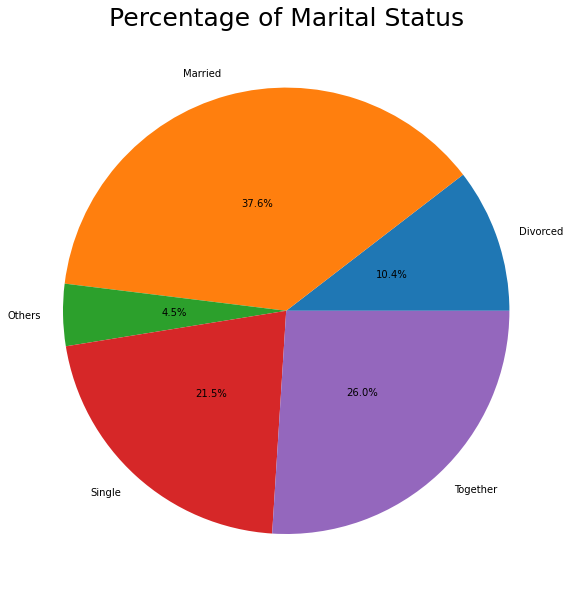

In [25]:
# 2b Enter your solution here
plt.figure(figsize=[10,12])
plt.pie(x, labels=x.index, autopct="%1.1f%%", pctdistance=0.5)
plt.title("Percentage of Marital Status", size=25)
plt.show()


## Qs 3.  
* a) Create a new variable called `Recency(weights)` which is obtained by dividing the `Recency` variable into quintiles (0,1,2,3,4) such that customers lower Recency values have higher weights. i.e the smaller the recency value, the greater the `Recency(weights)`.

    * **COMPULSORY**: Validate your resulting by running:

```python
df[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(n=5, random_state=2)
```

* b) What is the percentage of customers that accepted at least an offer after the end of the promotion campaign?

In [29]:
# 3a Enter your solution here

recency = df["Recency"]
num_bins = 5 # No of groups
label = np.flip(np.arange(0,5)) #no of label

recency_bin = pd.qcut(
                       x=recency, q=num_bins, duplicates="drop"
                       ).astype(str)

df["Recency(weights)"]= pd.qcut(
                                 x=recency, q=num_bins, labels=label, duplicates="drop"
                                ).astype(str)                    

dict_ = dict(itertools.zip_longest(recency_bin, df["Recency(weights)"]))
dict_

{'(39.0, 59.0]': '2',
 '(19.0, 39.0]': '3',
 '(79.0, 99.0]': '0',
 '(-0.001, 19.0]': '4',
 '(59.0, 79.0]': '1'}

In [30]:
df[["Recency", "Recency(weights)"]].sample(n=5, random_state=2)

,Recency,Recency(weights)
2053,46,2
2019,75,1
1891,87,0
335,38,3
1600,64,1


In [161]:
df[["total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(n=5, random_state=2)

,total_amount,Avg_amount,Avg_amount(weights)
2053,71,11.83,2
2019,22,3.67,0
1891,2069,344.83,9
335,946,157.67,7
1600,562,93.67,5


In [32]:
# getting the columns of campaign
campaign = [ var for var in columns if "Accepted" in var]
campaign.append("Response")
campaign

['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response']

In [33]:
# 3b Enter your solution here
df["total_promotion"] = df[campaign].sum(axis= 1)
atleast_one_promotion = df[df["total_promotion"] >= 1]
percentage_atleast_one_promotion = round((atleast_one_promotion.shape[0]/df.shape[0]) * 100, 2)
print(f" The percentage of customers that accepted at least one campaign is: {percentage_atleast_one_promotion}%")

 The percentage of customers that accepted at least one campaign is: 27.19%


## Qs 4.  
* a) Calculate the frequency of the purchases. (Do this by finding the total number of purchases made by every customer)
* b) Create a new variable, `Frequency(weights)` by converting the result from the previous question to quartiles (0,1,2,3) such that the higher the `Frequency`, the higher the weight.

    * **COMPULSORY**: Validate your resulting by running:

```python
df[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(n=5, random_state=2)
```

In [34]:
# getting the columns of purchase
purchase = [var for var in columns if "Purchases" in var]
purchase.remove("NumDealsPurchases")
purchase

['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

In [162]:
# 4a Enter your solution here
df["Frequencypurchase"] = df[purchase].sum(axis = 1)
df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','Frequencypurchase']]

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Frequencypurchase
0,8,10,4,22
1,1,1,2,4
2,8,2,10,20
3,2,0,4,6
4,5,3,6,14
...,...,...,...,...
2235,9,3,4,16
2236,8,2,5,15
2237,2,3,13,18
2238,6,5,10,21


In [36]:
# 4b Enter your solution here

freq = df["Frequencypurchase"]
num_bins = 4 # No of groups
label = np.arange(0,4) #no of label

frequency_bin = pd.qcut(
                       x=freq, q=num_bins, duplicates="drop"
                       ).astype(str)

df["Frequency(weights)"]= pd.qcut(
                                 x=freq, q=num_bins, labels=label, duplicates="drop"
                                ).astype(str)                    


dict_ = dict(itertools.zip_longest(frequency_bin, df["Frequency(weights)"]))
dict_

{'(18.0, 32.0]': '3',
 '(-0.001, 6.0]': '0',
 '(12.0, 18.0]': '2',
 '(6.0, 12.0]': '1'}

In [39]:
df[['Frequencypurchase','Frequency(weights)']].sample(5)

,Frequencypurchase,Frequency(weights)
371,10,1
121,6,0
1639,4,0
305,22,3
307,17,2


## Qs 5.  
* a) Calculate the `Customer Personality Analysis` using **RFM** (Recency Frequency Monetary) value using the formula:
`Recency(weights)` + `Frequency(weights)` + `Avg_amount(weights)`. 
* b) Create a new variable called `Customer_value` by segmenting the customers using the RFM value. The RFM value should be converted into tercile (3 groups). Customer_value should have the following labels: `high_value`, `medium_value` and `low_value` which represents the binned RFM values.

    * **COMPULSORY**: Validate your resulting by running:
```python
df[["Recency(weights)", "Frequency(weights)", "Avg_amount(weights)", "RFM", "Customer_value"]].sample(n=10, random_state=2)
```

In [78]:
# getting the columns
weight = ['Recency(weights)', 'Frequency(weights)', 'Avg_amount(weights)']
weight

['Recency(weights)', 'Frequency(weights)', 'Avg_amount(weights)']

In [194]:
# 5a Enter your solution here

df["RFM"] = df[weight].sum(axis = 1)
df["RFM"]

0       239.0
1       300.0
2       336.0
3       301.0
4        25.0
        ...  
2235    228.0
2236    225.0
2237     28.0
2238    436.0
2239    213.0
Name: RFM, Length: 2240, dtype: float64

### Good day Sir! Sir I don't know why my RFM is not calculating the right thing, I checked many times but could not see any mistake, i even use numpy to add, it gave different values and still not calculating well, could you please help me figure out. Thank you!!

In [195]:
# 5b Enter your solution here

df["RFM"] = df["RFM"].apply(pd.to_numeric) #converting the column to numeric varialble

data = df["RFM"]
num_bins = 3 # No of groups
label = ["height_value", "medium_value", "low_value"] #no of label

df["Customer_value"]= pd.qcut(
                       x=data, q=num_bins, duplicates="drop"
                       ).astype(str)
value_bins = df["Customer_value"].value_counts().index
value = ["low_value", "medium_value", "height_value"]

value_dict = dict(itertools.zip_longest(value_bins,value))

value_dict

{'(-0.001, 128.0]': 'low_value',
 '(128.0, 313.0]': 'medium_value',
 '(313.0, 439.0]': 'height_value'}

In [196]:
# mapping the value bin
df["Customer_value"] = df["Customer_value"].map(value_dict)

In [197]:
df[["Recency(weights)", "Frequency(weights)", "Avg_amount(weights)", "RFM", "Customer_value"]]

,Recency(weights),Frequency(weights),Avg_amount(weights),RFM,Customer_value
0,2,3,9,239.0,medium_value
1,3,0,0,300.0,medium_value
2,3,3,6,336.0,height_value
3,3,0,1,301.0,medium_value
4,0,2,5,25.0,low_value
...,...,...,...,...,...
2235,2,2,8,228.0,medium_value
2236,2,2,5,225.0,medium_value
2237,0,2,8,28.0,low_value
2238,4,3,6,436.0,height_value
